## Installation

In [1]:
!pip install pandas
import pandas as pd
pd.__version__

'1.0.1'

In [2]:
!pip install numpy
import numpy as np
np.__version__

'1.18.1'

In [7]:
#instal matplotlib
!pip install matplotlib
import matplotlib.pyplot as plt

In [9]:
#instal seaborn
!pip install seaborn
import seaborn as sns
sns.__version__

'0.10.0'

## Import Data

In [10]:
data=pd.read_csv(r'E:\Job\IYKRA\task\modul4\Ritz_Jager_Data.csv', index_col=None)
#Check data type
data.info()
data['children']=data['children'].astype('Int64')
data['agent']=data['agent'].astype('Int64').astype(str)
data['company']=data['company'].astype('Int64').astype(str)
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date']) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [11]:
data.columns

Index(['hotel_type', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_type',
       'country_origin', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### 1. Where do the guests come from?


In [19]:
#alternative 1
country=data.groupby(['hotel_type', 'country_origin'], as_index=[False,True]).agg({'country_origin':'count'})
country.columns=['Total']
country

Total
hotel_type   country_origin       
City Hotel   ABW                 2
             AGO               338
             AIA                 1
             ALB                 9
             AND                 2
...                            ...
Resort Hotel VEN                 3
             VNM                 2
             ZAF                18
             ZMB                 1
             ZWE                 2

[291 rows x 1 columns]

In [21]:
#alternative 2
data.groupby(['country_origin', 'hotel_type']).size().unstack(fill_value=0)

hotel_type,City Hotel,Resort Hotel
country_origin,,
ABW,2,0
AGO,338,24
AIA,1,0
ALB,9,3
AND,2,5
...,...,...
VGB,1,0
VNM,6,2
ZAF,62,18


In [22]:
#alternative 3
pd.pivot_table(data, index=['country_origin'], columns=['hotel_type'] ,aggfunc={'country_origin':len}, fill_value=0)

country_origin             
hotel_type         City Hotel Resort Hotel
country_origin                            
ABW                         2            0
AGO                       338           24
AIA                         1            0
ALB                         9            3
AND                         2            5
...                       ...          ...
VGB                         1            0
VNM                         6            2
ZAF                        62           18
ZMB                         1            1
ZWE                         2            2

[177 rows x 2 columns]

In [23]:
#export result to excel
country.to_excel(r'E:\Job\IYKRA\task\modul4\country.xlsx', sheet_name='country', index = True)

### 2. How much do guests pay for a room per night?

In [24]:
pd.pivot_table(data, index=['assigned_room_type'], columns=['hotel_type'], values='adr', aggfunc={'adr':np.mean})

hotel_type,City Hotel,Resort Hotel
assigned_room_type,,
A,96.655321,81.393893
B,93.871163,101.749119
C,100.501925,114.363234
D,121.655856,86.872154
E,143.944862,107.613819
F,178.651526,120.727265
G,184.473986,159.751802
H,NaN,171.380772
I,NaN,40.843774


### 3. How does the price per night vary over the year

Text(0, 0.5, 'adr')

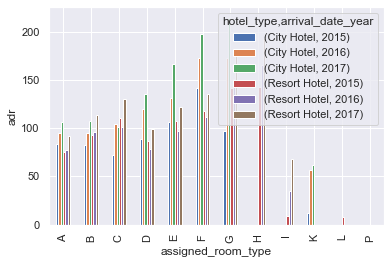

In [28]:
pd.pivot_table(data, index=['assigned_room_type'], columns=['hotel_type', 'arrival_date_year'], values='adr', aggfunc={'adr':np.mean}).plot(kind='bar')
plt.ylabel('adr')

### 4. Which are the busiest months?

In [29]:
#alternative 1
month=data.groupby(['hotel_type', 'arrival_date_month'], as_index=[False,True]).agg({'arrival_date_month':'count'})
month.columns=['Total']
month

Total
hotel_type   arrival_date_month       
City Hotel   April                7480
             August               8983
             December             4132
             February             4965
             January              3736
             July                 8088
             June                 7894
             March                6458
             May                  8232
             November             4357
             October              7605
             September            7400
Resort Hotel April                3609
             August               4894
             December             2648
             February             3103
             January              2193
             July                 4573
             June                 3045
             March                3336
             May                  3559
             November             2437
             October              3555
             September            3108

In [ ]:
#alternative 2
data.groupby(['hotel_type', 'arrival_date_month']).size().unstack(fill_value=0)

In [ ]:
#alternative 3
month_busy=pd.crosstab(data['hotel_type'], data['arrival_date_month'].fillna('n/a'))

In [ ]:
month_busy
month_busy.max(axis=1) #to find the max in each row
month_busy.idxmax(axis=1, skipna=True) #to find the referred index
#month_busy[month_busy.August == month_busy.August.max()] #to find the entire referred column, here is column of August

### 5. How long do people stay at the hotels?

In [ ]:
pd.pivot_table(data, index=['hotel_type'], columns=['arrival_date_year'] ,aggfunc={'stays_in_weekend_nights':np.mean, 'stays_in_week_nights':np.mean})

### 6. Bookings by market segment

In [ ]:
pd.crosstab(data['market_segment'], data['hotel_type'].fillna('n/a'))

### 7. How many bookings were cancelled?

In [ ]:
pd.crosstab(data['hotel_type'],data['is_canceled'].fillna('n/a'))

### 8. Which month has the highest number of cancellations?

Text(0, 0.5, 'number of cancellations')

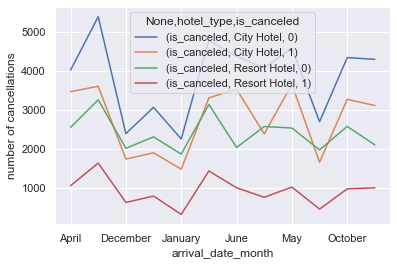

In [13]:
sns.set()
month_cancel=pd.pivot_table(data, index=['arrival_date_month'], columns=['hotel_type', 'is_canceled'] ,aggfunc={'is_canceled':len}, fill_value=0)
month_cancel.plot(kind='line')
plt.ylabel('number of cancellations')

In [14]:
month_cancel.max(axis=0) #to find the max in each row
month_cancel.idxmax(axis=0, skipna=True) #to find the referred index

             hotel_type    is_canceled
is_canceled  City Hotel    0              August
                           1                 May
             Resort Hotel  0              August
                           1              August
dtype: object

In [15]:
month_cancel.max().max() #to get the maximum across the table

5381

In [16]:
month_cancel.loc[('May', 'August'),('is_canceled')]

hotel_type         City Hotel       Resort Hotel      
is_canceled                 0     1            0     1
arrival_date_month                                    
May                      4579  3653         2535  1024
August                   5381  3602         3257  1637